In [1]:
from sklearn.svm import LinearSVC
from scipy.special import erf

import nest

In [2]:
import pylab

In [3]:
neuron = nest.Create("iaf_psc_alpha")

In [4]:
nest.GetStatus(neuron)

({'archiver_length': 0,
  'beta_Ca': 0.001,
  'C_m': 250.0,
  'Ca': 0.0,
  'E_L': -70.0,
  'element_type': <SLILiteral: neuron>,
  'frozen': False,
  'global_id': 1,
  'I_e': 0.0,
  'local': True,
  'local_id': 1,
  'model': <SLILiteral: iaf_psc_alpha>,
  'node_uses_wfr': False,
  'parent': 0,
  'post_trace': 0.0,
  'recordables': (<SLILiteral: I_syn_ex>,
   <SLILiteral: I_syn_in>,
   <SLILiteral: V_m>,
   <SLILiteral: weighted_spikes_ex>,
   <SLILiteral: weighted_spikes_in>),
  'supports_precise_spikes': False,
  'synaptic_elements': {},
  't_ref': 2.0,
  't_spike': -1.0,
  'tau_Ca': 10000.0,
  'tau_m': 10.0,
  'tau_minus': 20.0,
  'tau_minus_triplet': 110.0,
  'tau_syn_ex': 2.0,
  'tau_syn_in': 2.0,
  'thread': 0,
  'thread_local_id': -1,
  'V_m': -70.0,
  'V_min': -inf,
  'V_reset': -70.0,
  'V_th': -55.0,
  'vp': 0},)

In [8]:
nest.GetStatus(neuron, "I_e")

(0.0,)

In [9]:
nest.GetStatus(neuron, ["V_reset", "V_th"])

((-70.0, -55.0),)

In [10]:
nest.SetStatus(neuron, {"I_e": 376.0})

In [11]:
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})

In [12]:
spikedetector = nest.Create("spike_detector",
                            params={"withgid":True, "withtime":True})

In [13]:
nest.Connect(multimeter, neuron)

In [14]:
nest.Connect(neuron, spikedetector)

In [26]:
nest.Simulate(1000.0)

In [17]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

ValueError: x and y must have same first dimension, but have shapes (16,) and (999,)

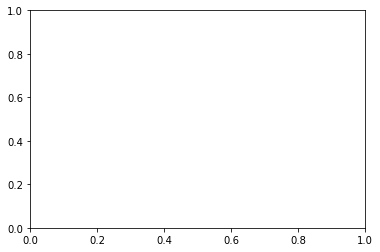

In [27]:
pylab.figure(1)
pylab.plot(ts, Vms)

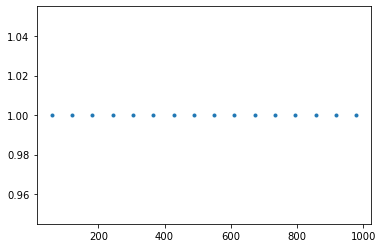

In [19]:
dSD = nest.GetStatus(spikedetector, keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts,evs,".")
pylab.show()

In [22]:
neuron2 = nest.Create("iaf_psc_alpha")
nest.SetStatus(neuron2, {"I_e": 370.0})

In [25]:
nest.Connect(multimeter, neuron2)

NESTErrors.IllegalConnection: ('IllegalConnection in Connect_g_g_D_D: Creation of connection is not possible because:\nUniversalDataLogger::connect_logging_device(): Each multimeter can only be connected once to a given node.', 'IllegalConnection', <SLILiteral: Connect_g_g_D_D>, ': Creation of connection is not possible because:\nUniversalDataLogger::connect_logging_device(): Each multimeter can only be connected once to a given node.')

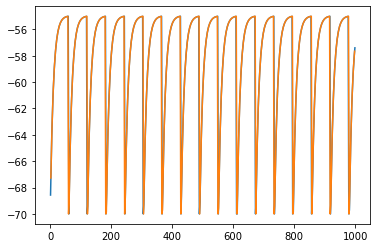

In [28]:
pylab.figure(2)
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
pylab.plot(ts1, Vms1)
Vms2 = dmm["events"]["V_m"][1::2] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::2]
pylab.plot(ts2, Vms2)

In [29]:
noise_ex = nest.Create("poisson_generator")
noise_in = nest.Create("poisson_generator")
nest.SetStatus(noise_ex, {"rate": 80000.0})
nest.SetStatus(noise_in, {"rate": 15000.0})

In [30]:
nest.SetStatus(neuron, {"I_e": 0.0})

In [31]:
syn_dict_ex = {"weight": 1.2}
syn_dict_in = {"weight": -2.0}
nest.Connect(noise_ex, neuron, syn_spec=syn_dict_ex)
nest.Connect(noise_in, neuron, syn_spec=syn_dict_in)

In [35]:
nest.Simulate(1000.0)

In [38]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

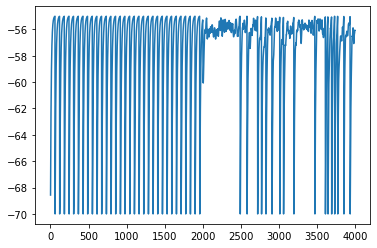

In [39]:
pylab.figure(2)
Vms1 = dmm["events"]["V_m"][::2] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::2]
pylab.plot(ts1, Vms1)